In [1]:
import os
import json

import numpy as np
import h5py
from keras.models import Model
from matplotlib import pyplot as plt
%matplotlib inline

from src.data_creator import ImageDataGenerator_for_multiinput
from src.model import generate_model, compile_model


Using TensorFlow backend.


In [2]:
Data_Generator = ImageDataGenerator_for_multiinput(width_shift_range=0.05, height_shift_range=0.05)

In [3]:
with h5py.File("cuhk03.h5", "r") as f:
    generator_train = Data_Generator.flow(f,
                                        train_or_validation='train',
                                        flag=0,
                                        batch_size=16
                                        )
    batch = np.array(generator_train.next())

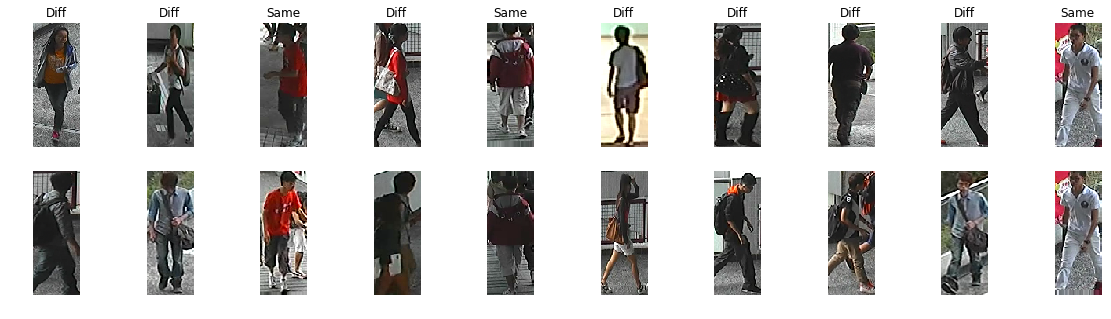

In [4]:
n_images = 10
fig = plt.figure(figsize=(20, 5))
for i in range(n_images):
    ax = plt.subplot(2, n_images, i+1)
    plt.imshow(batch[0][0][i])
    ax.set_axis_off()
    ax.set_title(("Same" if batch[1][i][1] else "Diff"))
    
    ax = plt.subplot(2, n_images, n_images+i+1)
    plt.imshow(batch[0][1][i])
    ax.set_axis_off()